In [1]:
from astropy.io import fits
from astropy.coordinates import SkyCoord
from pyvo.dal import imagesearch

In [2]:
# fits_images = ['814.fits','815.fits','886.fits','887.fits']
fits_images = ['mosaic_6deg_j00815_1asec.fits','mosaic_6deg_j00886_1asec.fits']
fits_files = [fits.open(f)[0] for f in fits_images]

In [3]:
from reproject.mosaicking import find_optimal_celestial_wcs
wcs_out, shape_out = find_optimal_celestial_wcs(fits_files)

In [4]:
wcs_out.to_header()  

WCSAXES =                    2 / Number of coordinate axes                      
CRPIX1  =      2309.4609986453 / Pixel coordinate of reference point            
CRPIX2  =      4333.1134646205 / Pixel coordinate of reference point            
CDELT1  =        -0.0002777778 / [deg] Coordinate increment at reference point  
CDELT2  =         0.0002777778 / [deg] Coordinate increment at reference point  
CUNIT1  = 'deg'                / Units of coordinate increment and value        
CUNIT2  = 'deg'                / Units of coordinate increment and value        
CTYPE1  = 'RA---TAN'           / Right ascension, gnomonic projection           
CTYPE2  = 'DEC--TAN'           / Declination, gnomonic projection               
CRVAL1  =      277.49523127846 / [deg] Coordinate value at reference point      
CRVAL2  =     -2.5023786781264 / [deg] Coordinate value at reference point      
LONPOLE =                180.0 / [deg] Native longitude of celestial pole       
LATPOLE =     -2.50237867812

In [5]:
from reproject import reproject_interp
from reproject.mosaicking import reproject_and_coadd
array, footprint = reproject_and_coadd(fits_files,
                                       wcs_out, shape_out=shape_out,
                                       reproject_function=reproject_interp)

Text(0.5, 1.0, 'Footprint')

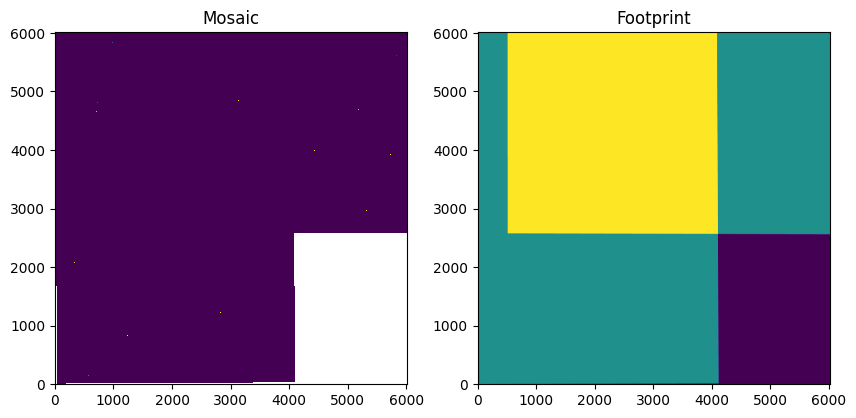

In [6]:
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
ax1 = plt.subplot(1, 2, 1)
im1 = ax1.imshow(array, origin='lower', vmin=600, vmax=800)
ax1.set_title('Mosaic')
ax2 = plt.subplot(1, 2, 2)
im2 = ax2.imshow(footprint, origin='lower')
ax2.set_title('Footprint')